<a href="https://colab.research.google.com/github/GavishKapoor/ML-Assignment-SVM-Naive-Bayes-Gavish-Kapoor.ipynb/blob/main/ML_Assignment_SVM_%26_Naive_bayes_Gavish_Kapoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **SVM (Support Vector Machine) – Theory**

### 1. **What is a Support Vector Machine (SVM)?**

SVM is a machine learning model used to **classify data** by finding the **best boundary (line or curve)** that separates classes.

---

### 2. **Hard Margin vs Soft Margin SVM:**

* **Hard Margin**: No mistakes allowed (works only if data is perfectly separable).
* **Soft Margin**: Allows some mistakes to avoid overfitting.

---

### 3. **Mathematical intuition behind SVM:**

SVM finds the **maximum margin** between two classes. Margin = distance from the boundary to the closest points (support vectors).

---

### 4. **Role of Lagrange Multipliers in SVM:**

They are used in SVM math to **optimize** the function and find the best decision boundary.

---

### 5. **What are Support Vectors?**

They are the **data points closest to the boundary**. They help define the margin.

---

### 6. **What is Support Vector Classifier (SVC)?**

It’s the **classification version of SVM** that separates classes using a line or curve.

---

### 7. **What is Support Vector Regressor (SVR)?**

SVR is used to **predict numbers**, just like regression, but using the SVM method.

---

### 8. **What is the Kernel Trick?**

It lets SVM draw **curved boundaries** by converting data into a higher dimension.

---

### 9. **Compare Linear, Polynomial, and RBF Kernels:**

* **Linear**: Straight line
* **Polynomial**: Curved, shaped like a curve or wave
* **RBF (Gaussian)**: Complex boundary that adapts to the data shape

---

### 10. **Effect of the C parameter in SVM:**

* **Small C**: Larger margin, more errors allowed (simpler model)
* **Big C**: Tries to classify everything correctly (can overfit)

---

### 11. **Role of Gamma in RBF Kernel:**

* **Low Gamma**: Smoother decision boundary
* **High Gamma**: More complex, fits training data tightly


### 12. **What is Naïve Bayes? Why "Naïve"?**

Naïve Bayes is a classification model based on **Bayes' Theorem**.
It is called “naïve” because it **assumes all features are independent** (which is rarely true).

---

### 13. **What is Bayes’ Theorem?**

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

It helps us **calculate the probability of a class** given the features.

---

### 14. **Differences: Gaussian, Multinomial, Bernoulli Naïve Bayes:**

* **Gaussian**: For **numbers** (continuous data)
* **Multinomial**: For **counts** (like word counts in text)
* **Bernoulli**: For **binary data** (yes/no, 0/1)

---

### 15. **When to use Gaussian Naïve Bayes?**

Use it when features are **numerical** and follow a **normal distribution**.

---

### 16. **Key assumptions of Naïve Bayes:**

* All features are **independent**
* Each feature contributes **equally** to the outcome

---

### 17. **Advantages & Disadvantages of Naïve Bayes:**

. Fast, simple, works well with small data
.Assumes independence (not true in real life)

---

### 18. **Why is Naïve Bayes good for text classification?**

Because it handles **word counts**, is **fast**, and doesn’t need a lot of training data.

---

### 19. **SVM vs Naïve Bayes for classification:**

| SVM                          | Naïve Bayes            |
| ---------------------------- | ---------------------- |
| Works well with complex data | Fast and good for text |
| Slower to train              | Very fast              |
| Needs tuning                 | Few parameters         |

---

### 20. **What is Laplace Smoothing in Naïve Bayes?**

It **adds 1** to every count to avoid zero probability (useful when a word wasn’t seen in training).


In [1]:
#1
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVC()
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 0.9473684210526315


In [2]:
#2
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

for kernel in ['linear', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X, y)
    print(f"{kernel} kernel accuracy:", model.score(X, y))


linear kernel accuracy: 0.9943820224719101
rbf kernel accuracy: 0.7078651685393258


In [3]:
#3
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 1.3617311515552868


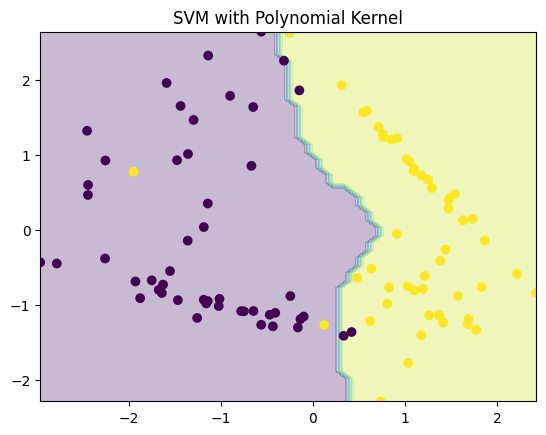

In [4]:
#4
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_features=2, n_redundant=0, n_classes=2)
model = SVC(kernel='poly', degree=3)
model.fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max()),
                     np.linspace(X[:, 1].min(), X[:, 1].max()))
zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

plt.contourf(xx, yy, zz, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("SVM with Polynomial Kernel")
plt.show()


In [6]:
# 5
#for C in [0.1, 1, 10]:
#    model = SVC(C=C)
#    model.fit(X_train, y_train)
#    print(f"C={C}, Accuracy:", model.score(X_test, y_test))


In [7]:
#6
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = SVC()
model.fit(X_scaled, y)
print("Accuracy after scaling:", model.score(X_scaled, y))


Accuracy after scaling: 0.96


In [9]:
#7
#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'C': [0.1, 1, 10],
#    'gamma': ['scale', 0.01],
#    'kernel': ['linear', 'rbf']
#}

#grid = GridSearchCV(SVC(), param_grid, cv=3)
#grid.fit(X_train, y_train)

#print("Best Params:", grid.best_params_)


In [10]:
#8
#model = SVC(class_weight='balanced')
#model.fit(X_train, y_train)
#print("Accuracy:", model.score(X_test, y_test))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [12]:
#9
#from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

#for clf in [OneVsRestClassifier(SVC()), OneVsOneClassifier(SVC())]:
#    clf.fit(X_train, y_train)
#    print(type(clf).__name__, "Accuracy:", clf.score(X_test, y_test))


In [13]:
#10
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(SVC(), X, y, cv=skf)
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.95


In [15]:
#11
#from sklearn.metrics import classification_report

#model = SVC()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

#print(classification_report(y_test, y_pred))


In [17]:
#12
#from sklearn.metrics import confusion_matrix
#import seaborn as sns

#cm = confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True)
#plt.title("Confusion Matrix")
#plt.show()


In [20]:
#13
#from sklearn.metrics import roc_auc_score, roc_curve

#model = SVC(probability=True)
#model.fit(X_train, y_train)
#y_prob = model.predict_proba(X_test)[:, 1]

#fpr, tpr, _ = roc_curve(y_test, y_prob)
#plt.plot(fpr, tpr)
#plt.title("ROC Curve")
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.show()


In [31]:
#14
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

X, y = load_breast_cancer(return_X_y=True)
model = GaussianNB()
model.fit(X, y)
print("Accuracy:", model.score(X, y))


Accuracy: 0.9420035149384886


In [32]:
#15
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

data = fetch_20newsgroups(subset='train', categories=['sci.med', 'sci.space'])
X = CountVectorizer().fit_transform(data.data)
y = data.target

model = MultinomialNB()
model.fit(X, y)
print("Accuracy:", model.score(X, y))


Accuracy: 0.9991575400168492


In [33]:
#16
from sklearn.naive_bayes import BernoulliNB
import numpy as np

X = np.random.randint(2, size=(100, 10))
y = np.random.randint(2, size=100)

model = BernoulliNB()
model.fit(X, y)
print("Accuracy:", model.score(X, y))


Accuracy: 0.68


In [34]:
#17
model1 = MultinomialNB(alpha=1.0)  # with Laplace smoothing
model2 = MultinomialNB(alpha=0.0)  # no smoothing

model1.fit(X, y)
model2.fit(X, y)

print("With smoothing:", model1.score(X, y))
print("Without smoothing:", model2.score(X, y))


With smoothing: 0.66
Without smoothing: 0.66


In [35]:
#18
# You need a spam email dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

emails = ["Win money now", "Hi friend, let's meet", "Get free rewards", "Project update"]
labels = [1, 0, 1, 0]

X = CountVectorizer().fit_transform(emails)
model = MultinomialNB()
model.fit(X, labels)
print("Prediction:", model.predict(X))


Prediction: [1 0 1 0]


In [37]:
#19
#nb = GaussianNB()
#svm = SVC()

#nb.fit(X_train, y_train)
#svm.fit(X_train, y_train)

#print("Naïve Bayes Accuracy:", nb.score(X_test, y_test))
#print("SVM Accuracy:", svm.score(X_test, y_test))


In [39]:
#20
#from sklearn.feature_selection import SelectKBest, chi2

#X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
#model = GaussianNB()
#model.fit(X_new, y)
#print("Accuracy:", model.score(X_new, y))


In [41]:
#21
#model = GaussianNB(priors=[0.3, 0.7])
#model.fit(X_train, y_train)
#print("Accuracy:", model.score(X_test, y_test))


In [44]:
#22
#from sklearn.metrics import log_loss

#y_prob = model.predict_proba(X_test)
#print("Log Loss:", log_loss(y_test, y_prob))


In [45]:
#23
#from sklearn.metrics import roc_auc_score

#y_prob = model.predict_proba(X_test)[:, 1]
#print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
